In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

#EDA

In [3]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [4]:
df.shape

(23486, 11)

In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


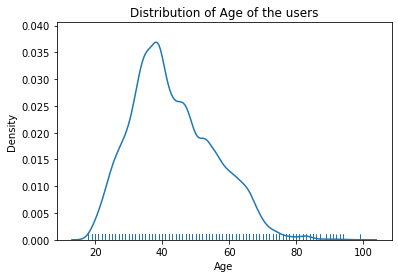

In [6]:
sns.distplot(df["Age"], rug=True, hist = False).set(title="Distribution of Age of the users")
plt.show()

[Text(0.5, 1.0, 'Rate count')]

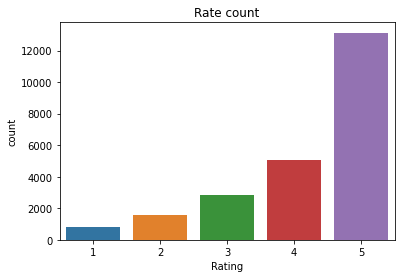

In [7]:
sns.countplot(x="Rating", data= df).set(title="Rate count")

[Text(0.5, 1.0, 'Count values of Recommended IND')]

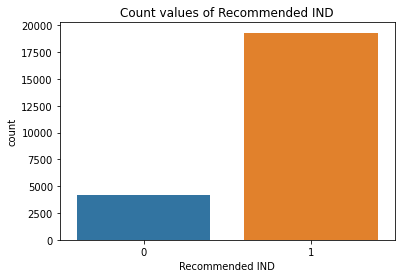

In [8]:
sns.countplot(x="Recommended IND", data=df).set(title="Count values of Recommended IND")

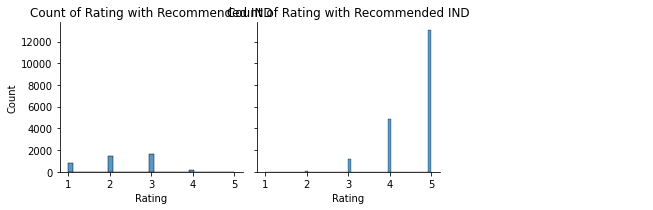

In [9]:
from seaborn.axisgrid import FacetGrid
g = FacetGrid(df, col="Recommended IND", palette="Set1", col_wrap= 3)
g.map(sns.histplot, "Rating")
g.set(title="Count of Rating with Recommended IND")
g.add_legend()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

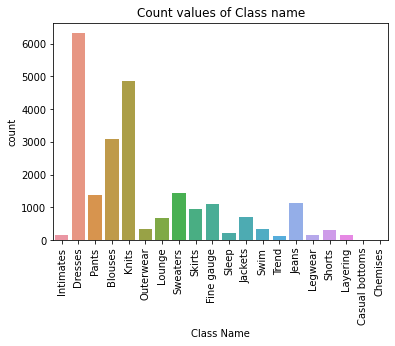

In [10]:
sns.countplot(x="Class Name", data=df).set(title="Count values of Class name")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

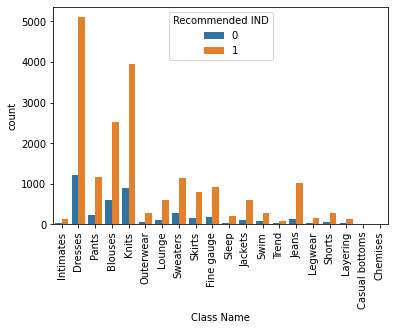

In [11]:
sns.countplot(x="Class Name", hue="Recommended IND", data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

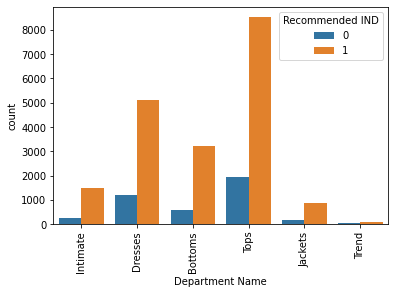

In [12]:
sns.countplot(x="Department Name", hue="Recommended IND", data=df)
plt.xticks(rotation=90)

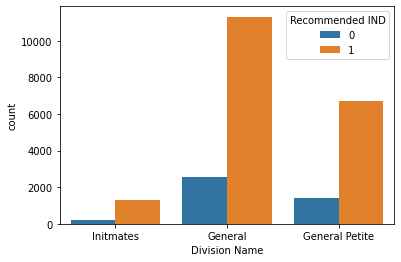

In [13]:
sns.countplot(x="Division Name", hue="Recommended IND", data=df)

In [14]:
df.groupby(['Rating'])['Recommended IND'].value_counts(normalize=True)

Rating  Recommended IND
1       0                  0.980998
        1                  0.019002
2       0                  0.939936
        1                  0.060064
3       0                  0.585859
        1                  0.414141
4       1                  0.966910
        0                  0.033090
5       1                  0.998096
        0                  0.001904
Name: Recommended IND, dtype: float64

From this,it can be dedcuded that 1 and 2 rating are negative, neutral is 3 and 4 and 5 are positive.

In [15]:
df["Rating"].replace({1: "negative", 2: "negative", 3: "neutral", 4: "positive", 5: "positive"}, inplace = True)

[Text(0.5, 1.0, 'Rate count')]

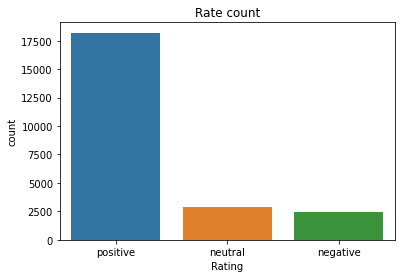

In [16]:
sns.countplot(x="Rating", data= df).set(title="Rate count")

[Text(0.5, 1.0, 'Kernel Density plot of positive feedback count')]

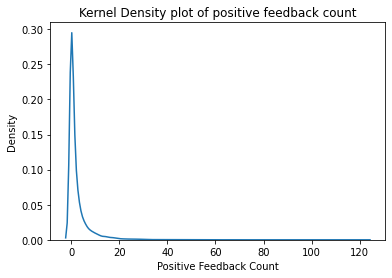

In [17]:
sns.kdeplot(data=df, x="Positive Feedback Count").set(title="Kernel Density plot of positive feedback count")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  object
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.8+ MB


In [19]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

#Fill the Null Values

In [20]:
df.fillna(method="bfill", inplace=True)

In [21]:
df.head()

Clothing ID  Age                    Title  \
0          767   33  Some major design flaws   
1         1080   34  Some major design flaws   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text    Rating  \
0  Absolutely wonderful - silky and sexy and comf...  positive   
1  Love this dress!  it's sooo pretty.  i happene...  positive   
2  I had such high hopes for this dress and reall...   neutral   
3  I love, love, love this jumpsuit. it's fun, fl...  positive   
4  This shirt is very flattering to all due to th...  positive   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [22]:
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

#Pre-Processing

In [23]:
data= df[["Review Text", "Recommended IND"]]

In [24]:
data.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

Stage1: Convert Review test to lowercase

In [25]:
def to_lowercase(data):
  d = []
  for i in data:
    i = i.lower()
    d.append(i) 
  return d   
d =to_lowercase(data["Review Text"])
d

['absolutely wonderful - silky and sexy and comfortable',
 'love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

Stage2: Tokenization

In [26]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
clean_data = [word_tokenize(word) for word in d]
clean_data

[['absolutely',
  'wonderful',
  '-',
  'silky',
  'and',
  'sexy',
  'and',
  'comfortable'],
 ['love',
  'this',
  'dress',
  '!',
  'it',
  "'s",
  'sooo',
  'pretty',
  '.',
  'i',
  'happened',
  'to',
  'find',
  'it',
  'in',
  'a',
  'store',
  ',',
  'and',
  'i',
  "'m",
  'glad',
  'i',
  'did',
  'bc',
  'i',
  'never',
  'would',
  'have',
  'ordered',
  'it',
  'online',
  'bc',
  'it',
  "'s",
  'petite',
  '.',
  'i',
  'bought',
  'a',
  'petite',
  'and',
  'am',
  "5'8",
  "''",
  '.',
  'i',
  'love',
  'the',
  'length',
  'on',
  'me-',
  'hits',
  'just',
  'a',
  'little',
  'below',
  'the',
  'knee',
  '.',
  'would',
  'definitely',
  'be',
  'a',
  'true',
  'midi',
  'on',
  'someone',
  'who',
  'is',
  'truly',
  'petite',
  '.'],
 ['i',
  'had',
  'such',
  'high',
  'hopes',
  'for',
  'this',
  'dress',
  'and',
  'really',
  'wanted',
  'it',
  'to',
  'work',
  'for',
  'me',
  '.',
  'i',
  'initially',
  'ordered',
  'the',
  'petite',
  'small',
 

Stage3: Clean Data to Remove Characters

In [28]:
import re

clean_data2 =[]
for words in clean_data:
  clean=[]
  for word in words:
    res = re.sub(r"[^\w\s]", "", word)
    if res !="":
      clean.append(res)
  clean_data2.append(clean) 
clean_data2

[['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable'],
 ['love',
  'this',
  'dress',
  'it',
  's',
  'sooo',
  'pretty',
  'i',
  'happened',
  'to',
  'find',
  'it',
  'in',
  'a',
  'store',
  'and',
  'i',
  'm',
  'glad',
  'i',
  'did',
  'bc',
  'i',
  'never',
  'would',
  'have',
  'ordered',
  'it',
  'online',
  'bc',
  'it',
  's',
  'petite',
  'i',
  'bought',
  'a',
  'petite',
  'and',
  'am',
  '58',
  'i',
  'love',
  'the',
  'length',
  'on',
  'me',
  'hits',
  'just',
  'a',
  'little',
  'below',
  'the',
  'knee',
  'would',
  'definitely',
  'be',
  'a',
  'true',
  'midi',
  'on',
  'someone',
  'who',
  'is',
  'truly',
  'petite'],
 ['i',
  'had',
  'such',
  'high',
  'hopes',
  'for',
  'this',
  'dress',
  'and',
  'really',
  'wanted',
  'it',
  'to',
  'work',
  'for',
  'me',
  'i',
  'initially',
  'ordered',
  'the',
  'petite',
  'small',
  'my',
  'usual',
  'size',
  'but',
  'i',
  'found',
  'this',
  'to',
  'be',
  'outr

Stage4: Stopwords

In [29]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords

In [31]:
clean_data3 =[]
for words in clean_data2:
  w = []
  for word in words:
    if not word in stopwords.words("english"):
      w.append(word)
  clean_data3.append(w)
clean_data3


[['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable'],
 ['love',
  'dress',
  'sooo',
  'pretty',
  'happened',
  'find',
  'store',
  'glad',
  'bc',
  'never',
  'would',
  'ordered',
  'online',
  'bc',
  'petite',
  'bought',
  'petite',
  '58',
  'love',
  'length',
  'hits',
  'little',
  'knee',
  'would',
  'definitely',
  'true',
  'midi',
  'someone',
  'truly',
  'petite'],
 ['high',
  'hopes',
  'dress',
  'really',
  'wanted',
  'work',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layers',
  'imo',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flir

Stage5 Lemmatization

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer

In [33]:
wnet = WordNetLemmatizer()

In [34]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
clean_data4 = []
for words in clean_data3:
  w = [wnet.lemmatize(word) for word in words]
  clean_data4.append(' '.join(str(x) for x in w))
clean_data4

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite 58 love length hit little knee would definitely true midi someone truly petite',
 'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt',
 'love tracy reese dress one petite 5 foot tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work 

Polarity and Subjectivity 

In [36]:
from textblob import TextBlob 

In [37]:
polarity_score = [TextBlob(item).sentiment.polarity for item in clean_data4]


In [38]:
pola_cat = ["positive" if score > 0
            else "negative" if score < 0
            else "neutral"
            for score in polarity_score]


In [39]:
pola_cat = pd.DataFrame(pola_cat)


In [40]:
pola_data = pd.DataFrame(clean_data4,polarity_score)

In [41]:
pola_data = pola_data.reset_index()

In [42]:
pola_data = pola_data.rename({0: "cleaned_data", "index": "pol_score"}, axis = 1)

In [43]:
pola_data.head()

pol_score                                       cleaned_data
0   0.633333        absolutely wonderful silky sexy comfortable
1   0.318750  love dress sooo pretty happened find store gla...
2   0.082300  high hope dress really wanted work initially o...
3   0.500000  love love love jumpsuit fun flirty fabulous ev...
4   0.458333  shirt flattering due adjustable front tie perf...

In [44]:
pola_cat.reset_index()
pola_data = pd.concat([pola_data, pola_cat[0]], axis = 1)


In [45]:
pola_data = pola_data.rename({0:"pola_cat"}, axis = 1)
pola_data

pol_score                                       cleaned_data  pola_cat
0       0.633333        absolutely wonderful silky sexy comfortable  positive
1       0.318750  love dress sooo pretty happened find store gla...  positive
2       0.082300  high hope dress really wanted work initially o...  positive
3       0.500000  love love love jumpsuit fun flirty fabulous ev...  positive
4       0.458333  shirt flattering due adjustable front tie perf...  positive
...          ...                                                ...       ...
23481   0.677778  happy snag dress great price easy slip flatter...  positive
23482   0.191667  reminds maternity clothes soft stretchy shiny ...  positive
23483   0.450000  fit well top see never would worked glad able ...  positive
23484   0.416667  bought dress wedding summer cute unfortunately...  positive
23485   0.373333  dress lovely platinum feminine fit perfectly e...  positive

[23486 rows x 3 columns]

In [46]:
neg_pol_data = pola_data.loc[pola_data["pola_cat"] == "negative"]
neg_pol_data

pol_score                                       cleaned_data  pola_cat
8      -0.046875  love dress usually get x run little snug bust ...  negative
14     -0.057143  nice choice holiday gathering like length graz...  negative
22     -0.058095  first pullover styling side zipper would nt pu...  negative
44     -0.042587  tried today local retailer comfortable flatter...  negative
72     -0.016667  short torso work well 34c bought 0 much stretc...  negative
...          ...                                                ...       ...
23323  -0.017428  got shirt day store surprise needed size zero ...  negative
23332  -0.034314  typically avoid jumpsuit romper etc always som...  negative
23414  -0.044048  front back material differ back shirt soft thi...  negative
23449  -0.039583  tried color really pretty fun donset want pair...  negative
23478  -0.078788  surprised positive review product terrible cut...  negative

[1266 rows x 3 columns]

In [47]:
pos_pol_data = pola_data.loc[pola_data["pola_cat"] == "positive"]
pos_pol_data

pol_score                                       cleaned_data  pola_cat
0       0.633333        absolutely wonderful silky sexy comfortable  positive
1       0.318750  love dress sooo pretty happened find store gla...  positive
2       0.082300  high hope dress really wanted work initially o...  positive
3       0.500000  love love love jumpsuit fun flirty fabulous ev...  positive
4       0.458333  shirt flattering due adjustable front tie perf...  positive
...          ...                                                ...       ...
23481   0.677778  happy snag dress great price easy slip flatter...  positive
23482   0.191667  reminds maternity clothes soft stretchy shiny ...  positive
23483   0.450000  fit well top see never would worked glad able ...  positive
23484   0.416667  bought dress wedding summer cute unfortunately...  positive
23485   0.373333  dress lovely platinum feminine fit perfectly e...  positive

[22081 rows x 3 columns]

#Creating Word Cloud

In [48]:
from wordcloud import WordCloud

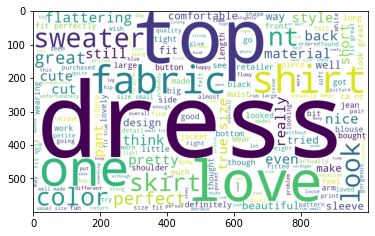

In [49]:
#rcParams["figure.figsize"] = 20, 8
word_cloud = ""
for words in clean_data4:
  for word in words:
    word_cloud += " ".join(word)
wordcloud = WordCloud(width=1000, height = 600, background_color="white", min_font_size=10).generate(word_cloud)
plt.imshow(wordcloud)

In [50]:
df1 = pd.DataFrame(clean_data4, columns = ["Review_text"])
df1.head()

Review_text
0        absolutely wonderful silky sexy comfortable
1  love dress sooo pretty happened find store gla...
2  high hope dress really wanted work initially o...
3  love love love jumpsuit fun flirty fabulous ev...
4  shirt flattering due adjustable front tie perf...

In [51]:
df1 = pd.concat([df1, df["Recommended IND"]], axis = 1)
df1.head()

Review_text  Recommended IND
0        absolutely wonderful silky sexy comfortable                1
1  love dress sooo pretty happened find store gla...                1
2  high hope dress really wanted work initially o...                0
3  love love love jumpsuit fun flirty fabulous ev...                1
4  shirt flattering due adjustable front tie perf...                1

Creating word for negative reviews

In [52]:
neg_df = df1.loc[df1["Recommended IND"] == 0]

In [53]:
neg_df.head()

Review_text  Recommended IND
2   high hope dress really wanted work initially o...                0
5   love tracy reese dress one petite 5 foot tall ...                0
10  dress run small esp zipper area run ordered sp...                0
22  first pullover styling side zipper would nt pu...                0
25  loved material didnt really look long dress pu...                0

Creating wordcloud neg with polarity

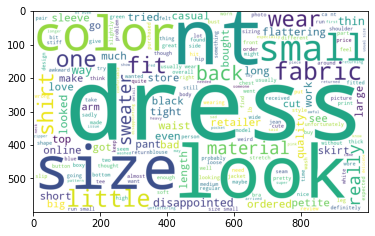

In [54]:
neg_word_cloud1 = ""
for words in neg_pol_data["cleaned_data"]:
  for word in words:
    neg_word_cloud1 += " ".join(word)
neg_word_cloud1 = WordCloud(width=1000, height = 600, background_color="white", min_font_size=10).generate(neg_word_cloud1)
plt.imshow(neg_word_cloud1)

Creating Word for Positive reviews

In [55]:
pos_df = df1.loc[df1["Recommended IND"] ==1]

In [56]:
pos_df.head()

Review_text  Recommended IND
0        absolutely wonderful silky sexy comfortable                1
1  love dress sooo pretty happened find store gla...                1
3  love love love jumpsuit fun flirty fabulous ev...                1
4  shirt flattering due adjustable front tie perf...                1
6  aded basket hte last mintue see would look lik...                1

Creating wordcloud pos with polarity

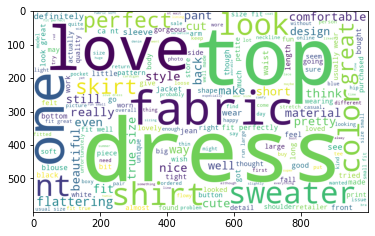

In [57]:
pos_word_cloud1 = ""
for words in pos_pol_data["cleaned_data"]:
  for word in words:
    pos_word_cloud1 += " ".join(word)
pos_word_cloud1 = WordCloud(width=1000, height = 600, background_color="white", min_font_size=10).generate(pos_word_cloud1)
plt.imshow(pos_word_cloud1)

In [58]:
pol_cat = pd.concat([pola_data], axis = 1)
pol_cat.head()

pol_score                                       cleaned_data  pola_cat
0   0.633333        absolutely wonderful silky sexy comfortable  positive
1   0.318750  love dress sooo pretty happened find store gla...  positive
2   0.082300  high hope dress really wanted work initially o...  positive
3   0.500000  love love love jumpsuit fun flirty fabulous ev...  positive
4   0.458333  shirt flattering due adjustable front tie perf...  positive

In [59]:
pol_cat = pol_cat.drop(["pol_score", "cleaned_data"], axis = 1)
pol_cat = pd.get_dummies(pol_cat)
pol_cat

pola_cat_negative  pola_cat_neutral  pola_cat_positive
0                      0                 0                  1
1                      0                 0                  1
2                      0                 0                  1
3                      0                 0                  1
4                      0                 0                  1
...                  ...               ...                ...
23481                  0                 0                  1
23482                  0                 0                  1
23483                  0                 0                  1
23484                  0                 0                  1
23485                  0                 0                  1

[23486 rows x 3 columns]

#Sentiment Classification Using Machine Learning

In [60]:
pola_data = pd.concat([pola_data, df["Recommended IND"]], axis = 1)
pola_data.head()

pol_score                                       cleaned_data  pola_cat  \
0   0.633333        absolutely wonderful silky sexy comfortable  positive   
1   0.318750  love dress sooo pretty happened find store gla...  positive   
2   0.082300  high hope dress really wanted work initially o...  positive   
3   0.500000  love love love jumpsuit fun flirty fabulous ev...  positive   
4   0.458333  shirt flattering due adjustable front tie perf...  positive   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

Vectorisation

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
clean_data4

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite 58 love length hit little knee would definitely true midi someone truly petite',
 'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt',
 'love tracy reese dress one petite 5 foot tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work 

In [63]:
cv = CountVectorizer()

In [64]:
traindata = cv.fit_transform(clean_data4)

In [65]:
traindata

<23486x15883 sparse matrix of type '<class 'numpy.int64'>'
	with 616742 stored elements in Compressed Sparse Row format>

In [66]:
X = traindata.toarray()

In [67]:
X = pd.DataFrame(X)

In [68]:
X.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   15873  15874  15875  15876  15877  15878  15879  15880  15881  15882  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 15883 columns]

In [69]:
X.shape

(23486, 15883)

In [70]:
X = pd.concat([X, pola_data["pol_score"], pol_cat], axis = 1)

In [71]:
y = df["Recommended IND"]

In [72]:
y = y.head(12000)

In [73]:
X = X.head(12000)
X.shape

(12000, 15887)

#Train Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [76]:
print(X_train.shape, y_train.shape)

(9600, 15887) (9600,)


In [77]:
print(X_test.shape, y_test.shape)

(2400, 15887) (2400,)


In [78]:
X_train

0  1  2  3  4  5  6  7  8  9  ...  15877  15878  15879  15880  15881  \
6405   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
7258   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
11682  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
10222  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
12     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
...   .. .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...    ...   
2064   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
10517  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
7985   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
2303   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
3392   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

       15882  pol_score  pola_cat_negative  pola_cat_neutral  \
6405       0   0.220833                  0                 0   
7258       0   0.360298                  0                 0   
11682      0   0.358333                  0                 0   
10222      0   0.466667                  0                 0   
12         0   0.164286                  0                 0   
...      ...        ...                ...               ...   
2064       0   0.227500                  0                 0   
10517      0   0.422222                  0                 0   
7985       0  -0.104928                  1                 0   
2303       0   0.465000                  0                 0   
3392       0   0.127273                  0                 0   

       pola_cat_positive  
6405                   1  
7258                   1  
11682                  1  
10222                  1  
12                     1  
...                  ...  
2064                   1  
10517                  1  
7985                   0  
2303                   1  
3392                   1  

[9600 rows x 15887 columns]

In [79]:
X_test

0  1  2  3  4  5  6  7  8  9  ...  15877  15878  15879  15880  15881  \
567    0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
10394  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4419   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4387   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
5521   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
...   .. .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...    ...   
2173   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
10617  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
11912  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4448   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4010   0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

       15882  pol_score  pola_cat_negative  pola_cat_neutral  \
567        0   0.418939                  0                 0   
10394      0   0.366667                  0                 0   
4419       0   0.297222                  0                 0   
4387       0   0.283333                  0                 0   
5521       0   0.166667                  0                 0   
...      ...        ...                ...               ...   
2173       0   0.039656                  0                 0   
10617      0   0.375000                  0                 0   
11912      0   0.433333                  0                 0   
4448       0   0.220000                  0                 0   
4010       0   0.132473                  0                 0   

       pola_cat_positive  
567                    1  
10394                  1  
4419                   1  
4387                   1  
5521                   1  
...                  ...  
2173                   1  
10617                  1  
11912                  1  
4448                   1  
4010                   1  

[2400 rows x 15887 columns]

#Machine Learning Tools

Naives Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
gnb = GaussianNB()

In [82]:
gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [83]:
Gau_pred = gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score

In [85]:
train_pred = gnb.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [86]:
print("Accuracy for train: ", accuracy_score(y_train, train_pred))

Accuracy for train:  0.6745833333333333


In [87]:
print("Accuracy for: test ", accuracy_score(y_test, Gau_pred))

Accuracy for: test  0.5283333333333333


In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
import numpy as np

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [92]:
mbn = MultinomialNB()
mbn.fit(X_train1, y_train)
mbn_pred = mbn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [93]:
print("Accuracy for train: ", accuracy_score(y_train, mbn.predict(X_train1)))
print("Accuracy for: test ", accuracy_score(y_test, mbn_pred))

Accuracy for train:  0.8940625
Accuracy for: test  0.855


In [94]:
from sklearn.naive_bayes import BernoulliNB

In [95]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [96]:
print("Accuracy for train: ", accuracy_score(y_train, bnb.predict(X_train)))
print("Accuracy for: test ", accuracy_score(y_test, bnb_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy for train:  0.8896875
Accuracy for: test  0.8595833333333334


Multinominal Naive Bayes proofs to have the best performance among the Naive Bayes classifiers

Evaluation of Naive Bayes model

In [97]:
'''print("Confusion Matrix of Naive Bayen: \n", confusion_matrix(mbn_pred, y_test))
print("fi_score of Naive Bayen:", f1_score(mbn_pred, y_test))
print("recall score of Naive Bayen: ", recall_score(mbn_pred, y_test))'''

'print("Confusion Matrix of Naive Bayen: \n", confusion_matrix(mbn_pred, y_test))\nprint("fi_score of Naive Bayen:", f1_score(mbn_pred, y_test))\nprint("recall score of Naive Bayen: ", recall_score(mbn_pred, y_test))'

Support Vector Ma

In [98]:
from sklearn import svm

In [99]:
svc1 = svm.LinearSVC()
svc1.fit(X_train, y_train)
svc1_pred = svc1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [100]:
print("Accuracy for train: ", accuracy_score(y_train, svc1.predict(X_train)))
print("Accuracy for: test ", accuracy_score(y_test, svc1_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy for train:  0.9897916666666666
Accuracy for: test  0.8591666666666666


In [101]:
print("Confusion Matrix of Linear Support Vector Machine: ", confusion_matrix(y_test, svc1_pred))
print("fi_score of Linear Support Vector Machine:", f1_score(y_test, svc1_pred))
print("recall score of Linear Support Vector Machine: ", recall_score(y_test, svc1_pred))

Confusion Matrix of Linear Support Vector Machine:  [[ 239  173]
 [ 165 1823]]
fi_score of Linear Support Vector Machine: 0.9151606425702811
recall score of Linear Support Vector Machine:  0.9170020120724346


Random Forest 

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf = RandomForestClassifier(random_state= 30, max_depth = 10, n_estimators = 100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [104]:
print("Confusion Matrix of Random Forest Classifier: ", confusion_matrix(rf_pred, y_test))
print("fi_score of Random Forest Classifier:", f1_score(rf_pred, y_test))
print("recall score of Random Forest Classifier: ", recall_score(rf_pred, y_test))

Confusion Matrix of Random Forest Classifier:  [[   0    0]
 [ 412 1988]]
fi_score of Random Forest Classifier: 0.9061075660893345
recall score of Random Forest Classifier:  0.8283333333333334


Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

In [107]:
print("Confusion Matrix of Logistic Regression: \n", confusion_matrix(LR_pred, y_test))
print("fi_score of Logistic Regression:", f1_score(LR_pred, y_test))
print("recall score of Logistic Regression: ", recall_score(LR_pred, y_test))

Confusion Matrix of Logistic Regression: 
 [[ 241  103]
 [ 171 1885]]
fi_score of Logistic Regression: 0.9322453016815035
recall score of Logistic Regression:  0.916828793774319


From the models tested, Logistic regression has the highest value for f1 ad recall scores

#Saving the model

In [108]:
import joblib

In [109]:
filename = open("trained_model.pkl", "wb")

In [110]:
joblib.dump(LR, filename)

In [111]:
filename.close()